<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/fft_r14-ihnwtyv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [0]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.manifold import TSNE

Importing Dataset from GitHub

Train Data

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r14/2-fft-normal-n-0-3-r14.csv?token=AKVFSOCLBWUIZPO6VLLA6BS6ZQMP6')
print(df.shape)
df

(15625, 30)


,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,777,0,3,1,1,4,3,9,3,3,30,14,17,4,4,1.0,20,1,1,1,1,1,0,1,4,68,3,27,9,1
1,785,2,0,2,1,4,3,9,30,14,27,11,17,2,0,0.0,4,1,1,1,1,1,0,2,8,136,6,27,18,1
2,835,0,3,1,1,4,3,9,0,0,30,14,18,5,5,1.0,24,1,1,1,1,1,0,1,4,72,3,27,9,1
3,840,0,3,3,1,4,3,10,27,11,30,14,17,2,2,1.0,12,1,1,1,1,1,0,3,12,204,9,30,27,1
4,843,2,0,2,1,4,3,10,30,14,27,11,18,2,0,0.0,4,1,1,1,1,1,0,2,8,144,6,30,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15620,3268264,2,0,6,4,2,3,10,30,14,27,11,20036,2,0,0.0,25,1,1,1,1,1,0,24,48,961728,18,30,54,1
15621,3268271,2,0,6,5,3,3,10,30,14,27,11,20036,2,0,0.0,32,1,1,1,1,1,0,30,90,1803240,18,30,54,1
15622,3268272,2,0,2,1,4,3,11,30,14,27,11,20037,2,0,0.0,32,1,1,1,1,1,0,2,8,160296,6,33,18,1
15623,3268273,2,0,7,1,4,3,12,30,14,3,3,20036,4,0,0.0,5,1,1,1,1,1,0,7,28,561008,21,36,63,1


In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r14/2-fft-malicious-n-0-3-m-1-r14.csv?token=AKVFSOHSHMJNMRYFDRY7P6S6ZQMQE',nrows=25000)
df2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r14/2-fft-malicious-n-0-3-m-6-r14.csv?token=AKVFSOEBRDNNZHS72BYBKAC6ZQMQK',nrows=25000)
df3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r14/2-fft-malicious-n-0-3-m-9-r14.csv?token=AKVFSOFITE3ZHHYVNAMAH6K6ZQMQQ',nrows=25000)
df4 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r14/2-fft-malicious-n-0-3-m-14-r14.csv?token=AKVFSOGBQIENXKFI6NJP6RC6ZQMQY',nrows=25000)

df11 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r14/2-fft-normal-n-0-5-r14.csv?token=AKVFSOAEEM2AIZRSZBXGCJS6ZQMZY',nrows=25000)
df12 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r14/2-fft-normal-n-0-12-r14.csv?token=AKVFSOHPKQSZUTZ6HWTZDA26ZQMZ4',nrows=25000)
df13 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r14/2-fft-normal-n-0-15-r14.csv?token=AKVFSODUV577BQTFP2GJQS26ZQM2C',nrows=25000)

In [0]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df11.shape)
print(df12.shape)
print(df13.shape)

(23538, 30)
(24066, 30)
(23532, 30)
(25000, 30)
(15416, 30)
(25000, 30)
(25000, 30)


In [0]:
df = df.append(df1, ignore_index=True,sort=False)
df = df.append(df2, ignore_index=True,sort=False)
df = df.append(df3, ignore_index=True,sort=False)
df = df.append(df4, ignore_index=True,sort=False)
df = df.append(df11, ignore_index=True,sort=False)
df = df.append(df12, ignore_index=True,sort=False)
df = df.append(df13, ignore_index=True,sort=False)
df = df.sort_values('timestamp')
df.to_csv('fft-r1-train.csv',index=False)

In [0]:
df = pd.read_csv('fft-r1-train.csv')
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,7,2,0,1,1,4,3,9,14,14,23,7,3,3,0,0.0,4,6,1,6,6,36,0,1,4,12,3,27,9,0
1,15,2,4,1,1,4,3,9,12,12,23,7,2,5,2,0.4,12,1,1,1,1,1,8,1,4,8,3,27,9,1
2,84,0,3,4,1,1,5,17,23,7,14,14,3,3,3,1.0,16,5,2,6,10,60,0,4,4,12,20,85,100,0
3,85,0,3,4,2,2,5,17,23,7,14,14,3,3,3,1.0,17,4,3,6,12,72,0,8,16,48,20,85,100,0
4,86,0,3,4,3,2,5,17,23,7,14,14,3,3,3,1.0,18,3,4,6,12,72,0,12,24,72,20,85,100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177172,3269590,0,3,3,1,4,3,9,27,11,30,14,30065,2,2,1.0,12,1,1,1,1,1,0,3,12,360780,9,27,27,0
177173,3269596,2,0,6,5,3,3,12,30,14,27,11,30035,2,0,0.0,32,1,1,1,1,1,0,30,90,2703150,18,36,54,0
177174,3269597,2,0,2,1,4,3,9,30,14,27,11,30036,2,0,0.0,32,1,1,1,1,1,0,2,8,240288,6,27,18,0
177175,3269598,2,0,7,1,4,3,10,30,14,3,3,30035,4,0,0.0,6,1,1,1,1,1,0,7,28,840980,21,30,63,0


In [0]:
df.shape

(177177, 30)

Test Data

In [0]:
df5 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r14/2-fft-malicious-n-0-3-m-2-r14.csv?token=AKVFSOEJ34QJKHSBNXSONNS6ZQNCI',nrows=30000)
df6 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r14/2-fft-malicious-n-0-3-m-5-r14.csv?token=AKVFSOCLXPSP3NYHTCC3KG26ZQNCM',nrows=30000)
df7 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r14/2-fft-malicious-n-0-3-m-10-r14.csv?token=AKVFSOB7NY3KNDFHSJIESOC6ZQNCQ',nrows=30000)
df8 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r14/2-fft-malicious-n-0-3-m-12-r14.csv?token=AKVFSOC3VWHJ3BGL4KC4XKC6ZQNCW',nrows=30000)
df9 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r14/2-fft-malicious-n-0-3-m-13-r14.csv?token=AKVFSOCR3EQ34CLO6VAU6EK6ZQNC2',nrows=30000)
df10 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r14/2-fft-malicious-n-0-3-m-15-r14.csv?token=AKVFSOFIBFDUQDRUHTLV7CS6ZQNDA',nrows=30000)

df14 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r14/2-fft-normal-n-0-10-r14.csv?token=AKVFSOCNV5MARWPZFXWOKM26ZQNJ6',nrows=30000)
df5.shape

(24066, 30)

In [0]:
df5

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,777,0,3,1,1,4,3,9,3,3,30,14,25,4,4,1.0,20,1,1,1,1,1,0,1,4,100,3,27,9,0
1,785,2,0,2,1,4,3,9,30,14,27,11,25,2,0,0.0,4,1,1,1,1,1,0,2,8,200,6,27,18,0
2,794,0,3,1,1,4,3,9,2,2,30,14,26,3,3,1.0,16,1,1,1,1,1,0,1,4,104,3,27,9,0
3,802,2,0,2,1,4,3,10,30,14,27,11,26,2,0,0.0,4,1,1,1,1,1,0,2,8,208,6,30,18,0
4,840,0,3,3,1,4,3,9,27,11,30,14,25,2,2,1.0,12,1,1,1,1,1,0,3,12,300,9,27,27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24061,3269785,2,0,6,4,2,3,12,30,14,27,11,30059,2,0,0.0,25,1,1,1,1,1,0,24,48,1442832,18,36,54,0
24062,3269792,2,0,6,5,3,3,12,30,14,27,11,30059,2,0,0.0,32,1,1,1,1,1,0,30,90,2705310,18,36,54,0
24063,3269793,2,0,2,1,4,3,9,30,14,27,11,30060,2,0,0.0,32,1,1,1,1,1,0,2,8,240480,6,27,18,0
24064,3269794,2,0,7,1,4,3,10,30,14,3,3,30059,4,0,0.0,6,1,1,1,1,1,0,7,28,841652,21,30,63,0


In [0]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
packet_max_index              0
port_index                    0
cache_coherence_flit_index    0
flit_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_index                 0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [0]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
outport,1.000000,-0.260151,0.206981,-0.041214,0.060129,-0.325152,-0.213771,-0.032255,0.113023,-0.669153,-0.772206,-0.267215,-0.121869,-0.019617,-0.084948,-0.070615,-0.055885,0.511006,0.034944,0.052015,0.019652,0.090189,-0.286162,-0.078055,0.214554
inport,-0.260151,1.000000,-0.063190,0.031084,-0.045336,0.069437,-0.200331,0.119440,0.442524,0.565192,0.597928,0.278978,-0.087576,-0.167002,-0.152848,-0.125346,-0.094068,0.652885,0.011086,-0.005047,0.065062,-0.037926,-0.047509,0.001892,0.093108
cache_coherence_type,0.206981,-0.063190,1.000000,0.330557,-0.482062,-0.127958,-0.166573,0.127620,0.030551,-0.204469,-0.261822,-0.428884,-0.029994,-0.065161,-0.057131,-0.030931,-0.016877,0.116708,0.519451,0.425879,0.347864,0.938418,-0.149021,0.684097,-0.036533
flit_id,-0.041214,0.031084,0.330557,1.000000,-0.106190,0.077485,-0.007434,-0.005925,-0.026511,0.043660,0.014925,0.500213,0.010597,0.032919,0.026127,0.034233,0.021267,0.016747,0.967467,0.921881,0.618078,0.351929,0.042416,0.314226,0.010544
flit_type,0.060129,-0.045336,-0.482062,-0.106190,1.000000,-0.113074,0.010778,0.008645,0.038654,-0.063700,-0.021790,0.362738,-0.075419,0.053659,-0.013065,-0.021655,-0.014528,-0.024408,-0.183557,0.089915,0.065914,-0.513255,-0.061928,-0.458300,-0.015362
vnet,-0.325152,0.069437,-0.127958,0.077485,-0.113074,1.000000,0.877745,-0.203635,-0.037554,0.241628,0.335326,-0.086040,0.239053,0.172184,0.246906,0.161522,0.090447,-0.216139,-0.026512,-0.034610,-0.124825,0.222583,0.977363,0.635859,-0.209346
vc,-0.213771,-0.200331,-0.166573,-0.007434,0.010778,0.877745,1.000000,-0.190532,-0.166263,0.020131,0.083196,-0.123457,0.235778,0.214664,0.270445,0.186742,0.113331,-0.348463,-0.094732,-0.075036,-0.148635,0.142035,0.959244,0.515898,-0.242276
traversal_id,-0.032255,0.119440,0.127620,-0.005925,0.008645,-0.203635,-0.190532,1.000000,0.023089,0.013843,-0.012461,0.062199,-0.318859,-0.318830,-0.382867,-0.277334,-0.190361,0.100229,0.051740,0.047105,0.577495,0.054511,-0.204233,-0.050446,-0.254118
hop_count,0.113023,0.442524,0.030551,-0.026511,0.038654,-0.037554,-0.166263,0.023089,1.000000,0.534399,0.237288,0.232854,-0.081734,-0.109126,-0.114592,-0.095885,-0.071360,0.389148,-0.043584,-0.016595,-0.000623,0.016949,-0.095565,-0.003843,0.133905
current_hop,-0.669153,0.565192,-0.204469,0.043660,-0.063700,0.241628,0.020131,0.013843,0.534399,1.000000,0.885040,0.448043,0.048693,-0.071042,-0.013418,-0.014269,-0.010110,-0.077299,-0.051772,-0.059975,-0.034667,-0.116817,0.151395,0.018584,-0.024432


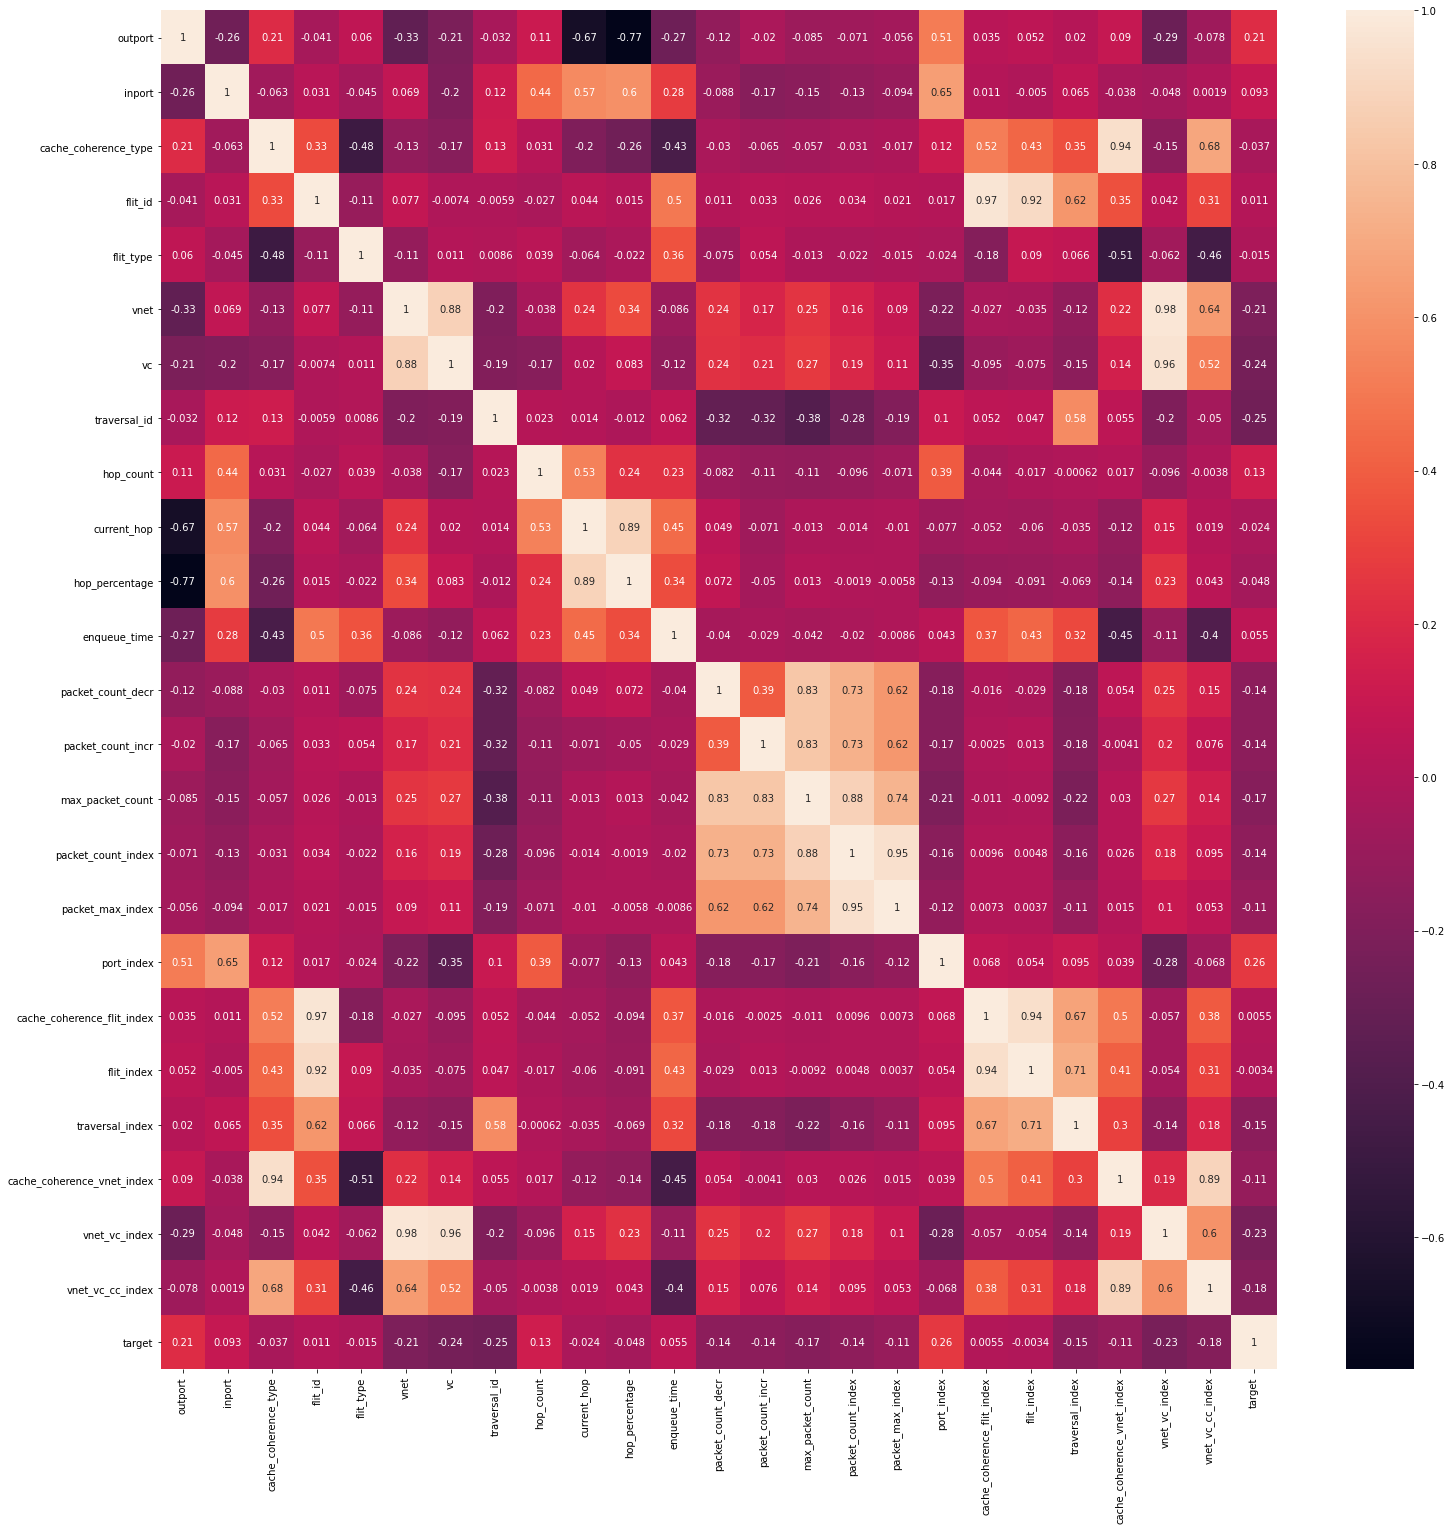

In [0]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

Processing Dataset for Training

In [0]:
train_X = df.drop(columns=['target'])
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,2,0,1,1,4,3,9,3,3,0,0.0,4,6,1,6,6,36,0,1,4,12,3,27,9
1,2,4,1,1,4,3,9,2,5,2,0.4,12,1,1,1,1,1,8,1,4,8,3,27,9
2,0,3,4,1,1,5,17,3,3,3,1.0,16,5,2,6,10,60,0,4,4,12,20,85,100
3,0,3,4,2,2,5,17,3,3,3,1.0,17,4,3,6,12,72,0,8,16,48,20,85,100
4,0,3,4,3,2,5,17,3,3,3,1.0,18,3,4,6,12,72,0,12,24,72,20,85,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177172,0,3,3,1,4,3,9,30065,2,2,1.0,12,1,1,1,1,1,0,3,12,360780,9,27,27
177173,2,0,6,5,3,3,12,30035,2,0,0.0,32,1,1,1,1,1,0,30,90,2703150,18,36,54
177174,2,0,2,1,4,3,9,30036,2,0,0.0,32,1,1,1,1,1,0,2,8,240288,6,27,18
177175,2,0,7,1,4,3,10,30035,4,0,0.0,6,1,1,1,1,1,0,7,28,840980,21,30,63


In [0]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.5,0.00,0.000000,0.00,1.000000,0.0,0.000,0.000033,0.500000,0.0,0.0,0.000000,0.151515,0.000000,0.151515,0.016393,0.003364,0.000000,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000
1,0.5,1.00,0.000000,0.00,1.000000,0.0,0.000,0.000000,0.833333,0.4,0.4,0.108108,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.0,0.75,0.500000,0.00,0.000000,1.0,1.000,0.000033,0.500000,0.6,1.0,0.162162,0.121212,0.030303,0.151515,0.029508,0.005671,0.000000,0.103448,0.000000,0.000001,0.944444,1.000000,1.000000
3,0.0,0.75,0.500000,0.25,0.333333,1.0,1.000,0.000033,0.500000,0.6,1.0,0.175676,0.090909,0.060606,0.151515,0.036066,0.006825,0.000000,0.241379,0.139535,0.000015,0.944444,1.000000,1.000000
4,0.0,0.75,0.500000,0.50,0.333333,1.0,1.000,0.000033,0.500000,0.6,1.0,0.189189,0.060606,0.090909,0.151515,0.036066,0.006825,0.000000,0.379310,0.232558,0.000024,0.944444,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177172,0.0,0.75,0.333333,0.00,1.000000,0.0,0.000,1.000000,0.333333,0.4,1.0,0.108108,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.068966,0.093023,0.133335,0.333333,0.000000,0.197802
177173,0.5,0.00,0.833333,1.00,0.666667,0.0,0.375,0.999002,0.333333,0.0,0.0,0.378378,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.999035,0.833333,0.155172,0.494505
177174,0.5,0.00,0.166667,0.00,1.000000,0.0,0.000,0.999035,0.333333,0.0,0.0,0.378378,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.034483,0.046512,0.088803,0.166667,0.000000,0.098901
177175,0.5,0.00,1.000000,0.00,1.000000,0.0,0.125,0.999002,0.666667,0.0,0.0,0.027027,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.206897,0.279070,0.310809,1.000000,0.051724,0.593407


In [0]:
train_X[train_X.duplicated()].shape

(5746, 24)

In [0]:
test_X = df5.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y = df5['target']

In [0]:
#standardization
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
test_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.0,0.75,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.50,0.8,1.0,0.262295,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.5,0.00,0.166667,0.00,1.000000,0.0,0.000000,0.000000,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.034483,0.046512,0.000037,0.166667,0.000000,0.166667
2,0.0,0.75,0.000000,0.00,1.000000,0.0,0.000000,0.000033,0.25,0.6,1.0,0.196721,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000
3,0.5,0.00,0.166667,0.00,1.000000,0.0,0.333333,0.000033,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.034483,0.046512,0.000040,0.166667,0.333333,0.166667
4,0.0,0.75,0.333333,0.00,1.000000,0.0,0.000000,0.000000,0.00,0.4,1.0,0.131148,0.0,0.0,0.0,0.0,0.0,0.0,0.068966,0.093023,0.000074,0.333333,0.000000,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24061,0.5,0.00,0.833333,0.75,0.333333,0.0,1.000000,0.999967,0.00,0.0,0.0,0.344262,0.0,0.0,0.0,0.0,0.0,0.0,0.793103,0.511628,0.533316,0.833333,1.000000,0.833333
24062,0.5,0.00,0.833333,1.00,0.666667,0.0,1.000000,0.999967,0.00,0.0,0.0,0.459016,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,0.833333,1.000000,0.833333
24063,0.5,0.00,0.166667,0.00,1.000000,0.0,0.000000,1.000000,0.00,0.0,0.0,0.459016,0.0,0.0,0.0,0.0,0.0,0.0,0.034483,0.046512,0.088858,0.166667,0.000000,0.166667
24064,0.5,0.00,1.000000,0.00,1.000000,0.0,0.333333,0.999967,0.50,0.0,0.0,0.032787,0.0,0.0,0.0,0.0,0.0,0.0,0.206897,0.279070,0.311086,1.000000,0.333333,1.000000


In [0]:
test_X[test_X.duplicated()].shape

(0, 24)

In [0]:
test_X1 = df6.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y1 = df6['target']
x = test_X1.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X1.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X1 = pd.DataFrame(x_scaled)
test_X1.columns = columns
print(test_X1[test_X1.duplicated()].shape)
test_X1

(0, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.0,0.75,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.50,0.8,1.0,0.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,0.75,0.000000,0.00,1.000000,0.0,0.333333,0.000033,0.25,0.6,1.0,0.187500,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000001,0.000000,0.333333,0.000000
2,0.5,0.00,0.166667,0.00,1.000000,0.0,0.000000,0.000000,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.034483,0.046512,0.000037,0.166667,0.000000,0.166667
3,0.5,0.00,0.166667,0.00,1.000000,0.0,0.333333,0.000033,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.034483,0.046512,0.000040,0.166667,0.333333,0.166667
4,0.0,0.75,0.333333,0.00,1.000000,0.0,0.000000,0.000000,0.00,0.4,1.0,0.125000,0.0,0.0,0.0,0.0,0.0,0.0,0.068966,0.093023,0.000074,0.333333,0.000000,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23527,0.5,0.00,0.833333,0.75,0.333333,0.0,1.000000,0.999967,0.00,0.0,0.0,0.328125,0.0,0.0,0.0,0.0,0.0,0.0,0.793103,0.511628,0.533316,0.833333,1.000000,0.833333
23528,0.5,0.00,0.833333,1.00,0.666667,0.0,1.000000,0.999967,0.00,0.0,0.0,0.437500,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,0.833333,1.000000,0.833333
23529,0.5,0.00,0.166667,0.00,1.000000,0.0,0.000000,1.000000,0.00,0.0,0.0,0.437500,0.0,0.0,0.0,0.0,0.0,0.0,0.034483,0.046512,0.088858,0.166667,0.000000,0.166667
23530,0.5,0.00,1.000000,0.00,1.000000,0.0,0.333333,0.999967,0.50,0.0,0.0,0.015625,0.0,0.0,0.0,0.0,0.0,0.0,0.206897,0.279070,0.311086,1.000000,0.333333,1.000000


In [0]:
test_X2 = df7.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y2 = df7['target']
x = test_X2.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X2.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X2 = pd.DataFrame(x_scaled)
test_X2.columns = columns
print(test_X2[test_X2.duplicated()].shape)
test_X2

(0, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.0,0.75,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.6,0.8,1.0,0.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.5,0.00,0.166667,0.00,1.000000,0.0,0.000000,0.000000,0.2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.034483,0.046512,0.000037,0.166667,0.000000,0.166667
2,0.0,0.75,0.000000,0.00,1.000000,0.0,0.000000,0.000033,0.0,0.2,1.0,0.062500,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000
3,0.5,0.00,0.166667,0.00,1.000000,0.0,0.333333,0.000033,0.2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.034483,0.046512,0.000040,0.166667,0.333333,0.166667
4,0.0,0.75,0.333333,0.00,1.000000,0.0,0.000000,0.000000,0.2,0.4,1.0,0.125000,0.0,0.0,0.0,0.0,0.0,0.0,0.068966,0.093023,0.000074,0.333333,0.000000,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24055,0.5,0.00,0.833333,0.75,0.333333,0.0,1.000000,0.999967,0.2,0.0,0.0,0.328125,0.0,0.0,0.0,0.0,0.0,0.0,0.793103,0.511628,0.533316,0.833333,1.000000,0.833333
24056,0.5,0.00,0.833333,1.00,0.666667,0.0,1.000000,0.999967,0.2,0.0,0.0,0.437500,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,0.833333,1.000000,0.833333
24057,0.5,0.00,0.166667,0.00,1.000000,0.0,0.000000,1.000000,0.2,0.0,0.0,0.437500,0.0,0.0,0.0,0.0,0.0,0.0,0.034483,0.046512,0.088858,0.166667,0.000000,0.166667
24058,0.5,0.00,1.000000,0.00,1.000000,0.0,0.333333,0.999967,0.6,0.0,0.0,0.031250,0.0,0.0,0.0,0.0,0.0,0.0,0.206897,0.279070,0.311086,1.000000,0.333333,1.000000


In [0]:
test_X3 = df8.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y3 = df8['target']
x = test_X3.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X3.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X3 = pd.DataFrame(x_scaled)
test_X3.columns = columns
print(test_X3[test_X3.duplicated()].shape)
test_X3

(22, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.50,1.00,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.75,0.4,0.400000,0.125000,0.0,0.0,0.0,0.0,0.0,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.75,1.00,0.000000,0.00,1.000000,0.0,0.000000,0.000251,0.50,0.4,0.500000,0.125000,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.000011,0.000000,0.000000,0.000000
2,0.50,1.00,0.000000,0.00,1.000000,0.0,0.000000,0.000377,0.75,0.4,0.400000,0.125000,0.0,0.0,0.0,0.0,0.0,0.666667,0.000000,0.000000,0.000017,0.000000,0.000000,0.000000
3,0.50,1.00,0.000000,0.00,1.000000,0.0,0.000000,0.000795,0.75,0.4,0.400000,0.125000,0.0,0.0,0.0,0.0,0.0,0.666667,0.000000,0.000000,0.000035,0.000000,0.000000,0.000000
4,0.00,0.75,0.000000,0.00,1.000000,0.0,0.000000,0.000879,0.50,0.8,1.000000,0.250000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000039,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.75,1.00,0.666667,0.75,0.333333,0.0,0.000000,0.999916,0.25,0.4,0.666667,0.453125,0.0,0.0,0.0,0.0,0.0,1.000000,0.655172,0.418605,0.444646,0.666667,0.000000,0.666667
29996,0.75,1.00,0.666667,1.00,0.666667,0.0,0.000000,0.999916,0.25,0.4,0.666667,0.562500,0.0,0.0,0.0,0.0,0.0,1.000000,0.827586,0.825581,0.833716,0.666667,0.000000,0.666667
29997,0.75,1.00,0.000000,0.00,1.000000,0.0,0.333333,0.999958,0.25,0.4,0.666667,0.562500,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.044461,0.000000,0.333333,0.000000
29998,0.50,1.00,0.833333,0.00,0.000000,0.0,0.000000,1.000000,0.50,0.4,0.500000,0.125000,0.0,0.0,0.0,0.0,0.0,0.666667,0.172414,0.023256,0.066698,0.833333,0.000000,0.833333


In [0]:
test_X4 = df9.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y4 = df9['target']
x = test_X4.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X4.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X4 = pd.DataFrame(x_scaled)
test_X4.columns = columns
print(test_X4[test_X4.duplicated()].shape)
test_X4

(32, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.50,1.00,0.000000,0.00,1.000000,0.0,0.0,0.000000,0.6,0.2,0.250000,0.063492,0.0,0.0,0.0,0.0,0.0,0.666667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,0.75,1.00,0.000000,0.00,1.000000,0.0,0.0,0.000210,0.4,0.2,0.333333,0.063492,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.000009,0.000000,0.0,0.000000
2,0.50,1.00,0.000000,0.00,1.000000,0.0,0.0,0.000336,0.6,0.2,0.250000,0.063492,0.0,0.0,0.0,0.0,0.0,0.666667,0.000000,0.000000,0.000015,0.000000,0.0,0.000000
3,0.50,1.00,0.000000,0.00,1.000000,0.0,0.0,0.000755,0.6,0.2,0.250000,0.063492,0.0,0.0,0.0,0.0,0.0,0.666667,0.000000,0.000000,0.000034,0.000000,0.0,0.000000
4,0.00,0.75,0.000000,0.00,1.000000,0.0,0.0,0.000923,0.6,0.8,1.000000,0.253968,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000041,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.50,1.00,0.833333,0.00,0.000000,0.0,0.0,1.000000,0.6,0.4,0.500000,0.126984,0.0,0.0,0.0,0.0,0.0,0.666667,0.172414,0.023256,0.066661,0.833333,0.0,0.833333
29996,0.50,1.00,0.833333,0.25,0.333333,0.0,0.0,1.000000,0.6,0.4,0.500000,0.238095,0.0,0.0,0.0,0.0,0.0,0.666667,0.379310,0.232558,0.266663,0.833333,0.0,0.833333
29997,0.50,1.00,0.833333,0.50,0.333333,0.0,0.0,1.000000,0.6,0.4,0.500000,0.349206,0.0,0.0,0.0,0.0,0.0,0.666667,0.586207,0.372093,0.399997,0.833333,0.0,0.833333
29998,0.50,1.00,0.833333,0.75,0.333333,0.0,0.0,1.000000,0.6,0.4,0.500000,0.460317,0.0,0.0,0.0,0.0,0.0,0.666667,0.793103,0.511628,0.533331,0.833333,0.0,0.833333


In [0]:
test_X5 = df10.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y5 = df10['target']
x = test_X5.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X5.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X5 = pd.DataFrame(x_scaled)
test_X5.columns = columns
print(test_X5[test_X5.duplicated()].shape)
test_X5

(33, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,1.00,0.5,0.000000,0.00,1.000000,0.0,0.0,0.000000,0.6,0.2,0.250000,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,1.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,0.75,0.5,0.000000,0.00,1.000000,0.0,0.0,0.000144,0.4,0.2,0.333333,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,0.75,0.000000,0.000000,0.000006,0.000000,0.0,0.000000
2,1.00,0.5,0.000000,0.00,1.000000,0.0,0.0,0.000433,0.6,0.2,0.250000,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,1.00,0.000000,0.000000,0.000019,0.000000,0.0,0.000000
3,1.00,0.5,0.000000,0.00,1.000000,0.0,0.0,0.000578,0.8,0.2,0.200000,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,1.00,0.000000,0.000000,0.000026,0.000000,0.0,0.000000
4,1.00,0.5,0.000000,0.00,1.000000,0.0,0.0,0.000866,0.8,0.2,0.200000,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,1.00,0.000000,0.000000,0.000039,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.75,0.5,0.666667,0.00,0.000000,0.0,0.0,1.000000,0.6,0.2,0.250000,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,0.75,0.137931,0.011628,0.055599,0.666667,0.0,0.666667
29996,0.75,0.5,0.666667,0.25,0.333333,0.0,0.0,1.000000,0.6,0.2,0.250000,0.196429,0.166667,0.000000,0.166667,0.023810,0.005682,0.75,0.310345,0.186047,0.222428,0.666667,0.0,0.666667
29997,0.75,0.5,0.666667,0.50,0.333333,0.0,0.0,1.000000,0.6,0.2,0.250000,0.321429,0.125000,0.041667,0.166667,0.041667,0.009233,0.75,0.482759,0.302326,0.333647,0.666667,0.0,0.666667
29998,0.75,0.5,0.666667,0.75,0.333333,0.0,0.0,1.000000,0.6,0.2,0.250000,0.446429,0.083333,0.083333,0.166667,0.047619,0.010417,0.75,0.655172,0.418605,0.444867,0.666667,0.0,0.666667


In [0]:
test_X6 = df14.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y6 = df14['target']
x = test_X6.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X6.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X6 = pd.DataFrame(x_scaled)
test_X6.columns = columns
print(test_X6[test_X6.duplicated()].shape)
test_X6

(0, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.0,0.75,0.000000,0.00,1.000000,0.0,0.000000,0.00000,0.0,0.2,1.0,0.076923,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.5,0.00,0.166667,0.00,1.000000,0.0,0.000000,0.00000,0.2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.034483,0.046512,0.000038,0.166667,0.000000,0.166667
2,0.0,0.75,0.333333,0.00,1.000000,0.0,0.000000,0.00000,0.2,0.4,1.0,0.153846,0.0,0.0,0.0,0.0,0.0,0.0,0.068966,0.093023,0.000075,0.333333,0.000000,0.333333
3,0.0,0.75,0.000000,0.00,1.000000,0.0,0.333333,0.00005,0.8,1.0,1.0,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000002,0.000000,0.333333,0.000000
4,0.5,0.00,0.166667,0.00,1.000000,0.0,0.333333,0.00005,0.2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.034483,0.046512,0.000042,0.166667,0.333333,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15931,0.5,0.00,0.833333,0.75,0.333333,0.0,0.333333,0.99995,0.2,0.0,0.0,0.403846,0.0,0.0,0.0,0.0,0.0,0.0,0.793103,0.511628,0.533316,0.833333,0.333333,0.833333
15932,0.5,0.00,0.833333,1.00,0.666667,0.0,0.333333,0.99995,0.2,0.0,0.0,0.538462,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,0.833333,0.333333,0.833333
15933,0.5,0.00,0.166667,0.00,1.000000,0.0,0.666667,1.00000,0.2,0.0,0.0,0.538462,0.0,0.0,0.0,0.0,0.0,0.0,0.034483,0.046512,0.088859,0.166667,0.666667,0.166667
15934,1.0,0.00,1.000000,0.00,1.000000,0.0,1.000000,0.99995,0.8,0.0,0.0,0.038462,0.0,0.0,0.0,0.0,0.0,0.0,0.206897,0.279070,0.311085,1.000000,1.000000,1.000000


#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

Labels

1.   0 -  malicious
2.   1 -  good



In [0]:
train_Y = df['target']
train_Y.value_counts()

0    96136
1    81041
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=seed, shuffle=True)

Feature Selection

                         Specs        Score
5                         vnet  5922.208987
22               vnet_vc_index  4589.869150
6                           vc  3854.413490
17                  port_index  3644.258605
7                 traversal_id  1524.003335
0                      outport  1438.103644
14            max_packet_count  1244.994020
12           packet_count_decr   626.762512
13           packet_count_incr   618.249405
20             traversal_index   589.440612
23            vnet_vc_cc_index   480.472827
15          packet_count_index   437.333226
1                       inport   317.076446
16            packet_max_index   231.679453
21  cache_coherence_vnet_index   189.311238
8                    hop_count   186.302270
10              hop_percentage   102.241865


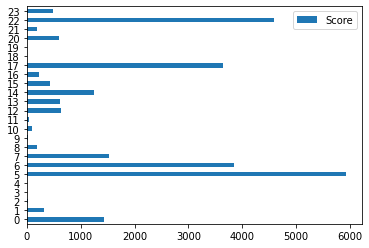

In [0]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k=17)
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(17,'Score'))
featureScores.plot(kind='barh')

Logistic Regression

In [0]:
#logistic regression
from sklearn.linear_model import LogisticRegression

In [0]:
logit_model=sm.Logit(train_Y,train_X)
#result=logit_model.fit()
#print(result.summary2())

In [0]:
logreg = LogisticRegression(C=5,penalty='l2',random_state=42, max_iter=500)
logreg.fit(X_train, y_train)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = logreg.predict(X_test)
logreg_score_train = logreg.score(X_train,y_train)
print("Train Prediction Score",logreg_score_train*100)
logreg_score_test = accuracy_score(y_test,y_pred)
print("Test Prediction ",logreg_score_test*100)

Train Prediction Score 70.90961683634234
Test Prediction  70.65413703578281


In [0]:
y_pred_test = logreg.predict(test_X)
logreg_score_test = accuracy_score(test_Y,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  94.09540430482839


In [0]:
y_pred_test = logreg.predict(test_X1)
logreg_score_test = accuracy_score(test_Y1,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  70.784463708992


In [0]:
y_pred_test = logreg.predict(test_X2)
logreg_score_test = accuracy_score(test_Y2,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  92.16541978387365


In [0]:
y_pred_test = logreg.predict(test_X3)
logreg_score_test = accuracy_score(test_Y3,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  79.75333333333333


In [0]:
y_pred_test = logreg.predict(test_X4)
logreg_score_test = accuracy_score(test_Y4,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  84.78


In [0]:
y_pred_test = logreg.predict(test_X5)
logreg_score_test = accuracy_score(test_Y5,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  42.483333333333334


In [0]:
y_pred_test = logreg.predict(test_X6)
logreg_score_test = accuracy_score(test_Y6,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  10.630020080321286


In [0]:
feature_importance=pd.DataFrame(np.hstack((np.array([columns[::]]).T, logreg.coef_.T)), columns=['feature', 'importance'])
feature_importance['importance']=pd.to_numeric(feature_importance['importance'])
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
17,port_index,5.998132
15,packet_count_index,5.376884
10,hop_percentage,3.628474
16,packet_max_index,2.078647
2,cache_coherence_type,1.681966
3,flit_id,1.406841
8,hop_count,1.073652
6,vc,1.052113
19,flit_index,0.689399
11,enqueue_time,0.518032


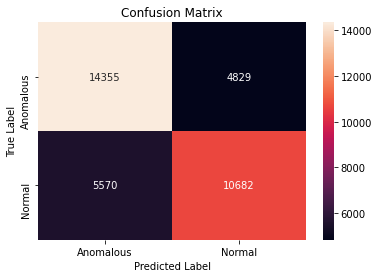

In [0]:
cm = confusion_matrix(y_test, y_pred)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.75      0.73     19184
           1       0.69      0.66      0.67     16252

    accuracy                           0.71     35436
   macro avg       0.70      0.70      0.70     35436
weighted avg       0.71      0.71      0.71     35436



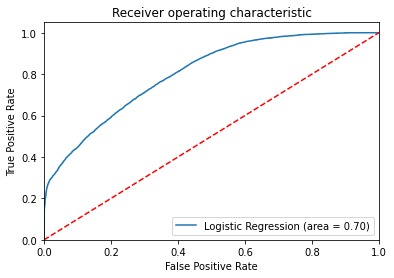

In [0]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LOG_ROC')
plt.show()

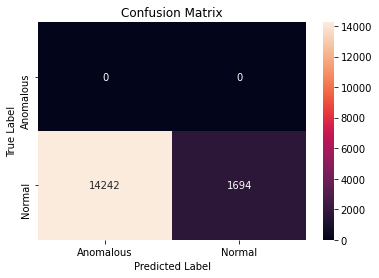

In [0]:
cm = confusion_matrix(test_Y6, y_pred_test)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(test_Y6, y_pred_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.11      0.19     15936

    accuracy                           0.11     15936
   macro avg       0.50      0.05      0.10     15936
weighted avg       1.00      0.11      0.19     15936



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNeighbors Classifier

In [0]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_pred_knn= knn.predict(X_test)

In [0]:
knn_score_train = knn.score(X_train,y_train)
print("Train Prediction Score",knn_score_train*100)
knn_score_test = accuracy_score(y_test,y_pred_knn)
print("Test Prediction ",knn_score_test*100)

Train Prediction Score 87.37344875512379
Test Prediction  79.74094141550965


In [0]:
y_pred_knn_test= knn.predict(test_X)
knn_score_test = accuracy_score(test_Y,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  78.62544668827391


In [0]:
y_pred_knn_test= knn.predict(test_X1)
knn_score_test = accuracy_score(test_Y1,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  76.76355600883903


In [0]:
y_pred_knn_test= knn.predict(test_X2)
knn_score_test = accuracy_score(test_Y2,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  72.26101413133831


In [0]:
y_pred_knn_test= knn.predict(test_X3)
knn_score_test = accuracy_score(test_Y3,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  46.13333333333333


In [0]:
y_pred_knn_test= knn.predict(test_X4)
knn_score_test = accuracy_score(test_Y4,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  55.19666666666667


In [0]:
y_pred_knn_test= knn.predict(test_X5)
knn_score_test = accuracy_score(test_Y5,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  38.14666666666667


In [0]:
y_pred_knn_test= knn.predict(test_X6)
knn_score_test = accuracy_score(test_Y6,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  30.465612449799195


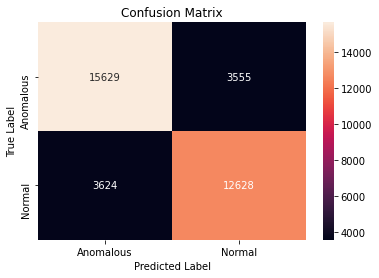

In [0]:
cm = confusion_matrix(y_test, y_pred_knn)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81     19184
           1       0.78      0.78      0.78     16252

    accuracy                           0.80     35436
   macro avg       0.80      0.80      0.80     35436
weighted avg       0.80      0.80      0.80     35436



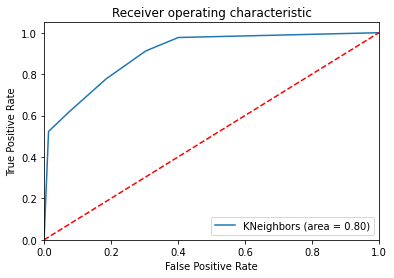

In [0]:
knn_roc_auc = roc_auc_score(y_test, y_pred_knn)
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNeighbors (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

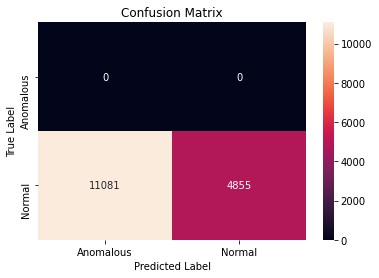

In [0]:
cm = confusion_matrix(test_Y6, y_pred_knn_test)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(test_Y6,y_pred_knn_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.30      0.47     15936

    accuracy                           0.30     15936
   macro avg       0.50      0.15      0.23     15936
weighted avg       1.00      0.30      0.47     15936



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Naive Bayes Classifier

In [0]:
#naive_bayes
from sklearn.naive_bayes import GaussianNB

In [0]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_pred_nb= nb.predict(X_test)

In [0]:
nb_score_train = nb.score(X_train,y_train)
print("Train Prediction Score",nb_score_train*100)
nb_score_test = accuracy_score(y_test,y_pred_nb)
print("Test Prediction Score",nb_score_test*100)

Train Prediction Score 54.52550779238188
Test Prediction Score 54.64217180268653


In [0]:
y_pred_nb_test= nb.predict(test_X)
nb_score_test = accuracy_score(test_Y,y_pred_nb_test)
print("Test Prediction Score",nb_score_test*100)

Test Prediction Score 39.291947145350285


In [0]:
y_pred_nb_test= nb.predict(test_X1)
nb_score_test = accuracy_score(test_Y1,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  37.58286588475268


In [0]:
y_pred_nb_test= nb.predict(test_X2)
nb_score_test = accuracy_score(test_Y2,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  39.04821280133001


In [0]:
y_pred_nb_test= nb.predict(test_X3)
nb_score_test = accuracy_score(test_Y3,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  33.303333333333335


In [0]:
y_pred_nb_test= nb.predict(test_X4)
nb_score_test = accuracy_score(test_Y4,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  34.50333333333334


In [0]:
y_pred_nb_test= nb.predict(test_X5)
nb_score_test = accuracy_score(test_Y5,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  35.193333333333335


In [0]:
y_pred_nb_test= nb.predict(test_X6)
nb_score_test = accuracy_score(test_Y6,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  63.91189759036144


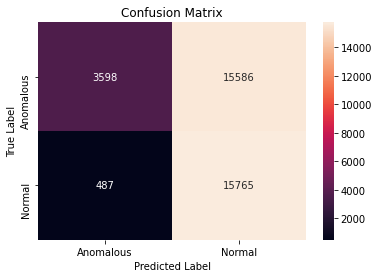

In [0]:
cm = confusion_matrix(y_test, y_pred_nb)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.88      0.19      0.31     19184
           1       0.50      0.97      0.66     16252

    accuracy                           0.55     35436
   macro avg       0.69      0.58      0.49     35436
weighted avg       0.71      0.55      0.47     35436



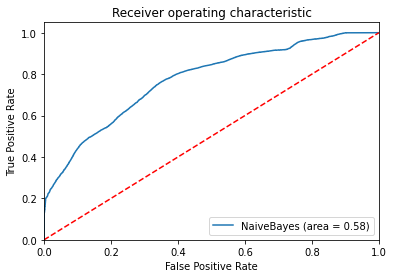

In [0]:
nb_roc_auc = roc_auc_score(y_test, y_pred_nb)
fpr, tpr, thresholds = roc_curve(y_test, nb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='NaiveBayes (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('NB_ROC')
plt.show()

### Neural Networks

In [0]:
#neuralnetwork
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Dropout
from keras.optimizers import SGD
from keras.layers import PReLU

2-Layer Neural Network

In [0]:
#2layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(2, activation='relu', input_shape=(n_cols,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2 )

Train on 113392 samples, validate on 28349 samples
Epoch 1/10
113392/113392 [==============================] - 4s 37us/step - loss: 0.1984 - accuracy: 0.6976 - val_loss: 0.1849 - val_accuracy: 0.7118
Epoch 2/10
113392/113392 [==============================] - 4s 36us/step - loss: 0.1835 - accuracy: 0.7110 - val_loss: 0.1818 - val_accuracy: 0.7141
Epoch 3/10
113392/113392 [==============================] - 4s 36us/step - loss: 0.1803 - accuracy: 0.7145 - val_loss: 0.1777 - val_accuracy: 0.7153
Epoch 4/10
113392/113392 [==============================] - 4s 36us/step - loss: 0.1756 - accuracy: 0.7166 - val_loss: 0.1735 - val_accuracy: 0.7200
Epoch 5/10
113392/113392 [==============================] - 4s 36us/step - loss: 0.1726 - accuracy: 0.7180 - val_loss: 0.1713 - val_accuracy: 0.7198
Epoch 6/10
113392/113392 [==============================] - 4s 36us/step - loss: 0.1708 - accuracy: 0.7191 - val_loss: 0.1695 - val_accuracy: 0.7195
Epoch 7/10
113392/113392 [=============================

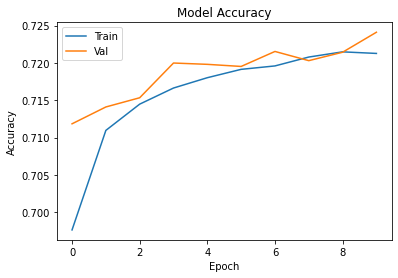

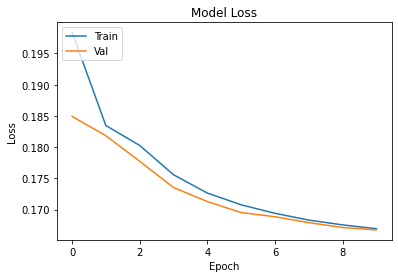

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 71.78%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 69.40%


In [0]:
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 47.59%


In [0]:
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 64.05%


In [0]:
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 62.19%


In [0]:
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 63.16%


In [0]:
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 36.59%


In [0]:
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 37.31%


3-Layer Neural Network

In [0]:
#3layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(4, activation="relu", input_shape=(n_cols,)))
model.add(Dense(2, activation="relu"))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2 )

Train on 113392 samples, validate on 28349 samples
Epoch 1/30
113392/113392 [==============================] - 4s 39us/step - loss: 0.2486 - accuracy: 0.5409 - val_loss: 0.2479 - val_accuracy: 0.5461
Epoch 2/30
113392/113392 [==============================] - 4s 37us/step - loss: 0.2483 - accuracy: 0.5421 - val_loss: 0.2479 - val_accuracy: 0.5461
Epoch 3/30
113392/113392 [==============================] - 4s 38us/step - loss: 0.2482 - accuracy: 0.5421 - val_loss: 0.2479 - val_accuracy: 0.5461
Epoch 4/30
113392/113392 [==============================] - 5s 41us/step - loss: 0.2482 - accuracy: 0.5421 - val_loss: 0.2479 - val_accuracy: 0.5461
Epoch 5/30
113392/113392 [==============================] - 5s 41us/step - loss: 0.2482 - accuracy: 0.5421 - val_loss: 0.2479 - val_accuracy: 0.5461
Epoch 6/30
113392/113392 [==============================] - 4s 37us/step - loss: 0.2482 - accuracy: 0.5421 - val_loss: 0.2479 - val_accuracy: 0.5461
Epoch 7/30
113392/113392 [=============================

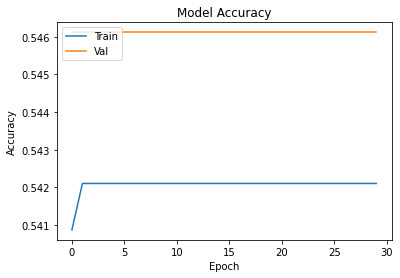

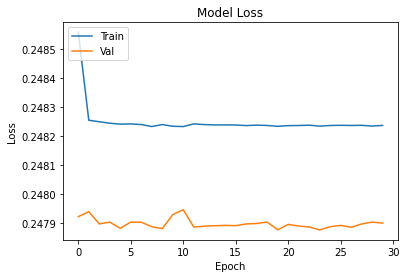

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 54.14%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 100.00%
accuracy: 100.00%
accuracy: 100.00%
accuracy: 100.00%
accuracy: 100.00%
accuracy: 100.00%
accuracy: 0.00%


4-Layer Neural Network



In [0]:
#4layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(8, activation='relu', input_shape=(n_cols,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2)

Train on 113392 samples, validate on 28349 samples
Epoch 1/30
113392/113392 [==============================] - 4s 38us/step - loss: 0.2187 - accuracy: 0.6627 - val_loss: 0.1962 - val_accuracy: 0.7007
Epoch 2/30
113392/113392 [==============================] - 4s 36us/step - loss: 0.1890 - accuracy: 0.7079 - val_loss: 0.1837 - val_accuracy: 0.7151
Epoch 3/30
113392/113392 [==============================] - 4s 36us/step - loss: 0.1812 - accuracy: 0.7175 - val_loss: 0.1781 - val_accuracy: 0.7224
Epoch 4/30
113392/113392 [==============================] - 5s 41us/step - loss: 0.1769 - accuracy: 0.7218 - val_loss: 0.1746 - val_accuracy: 0.7289
Epoch 5/30
113392/113392 [==============================] - 4s 37us/step - loss: 0.1742 - accuracy: 0.7258 - val_loss: 0.1723 - val_accuracy: 0.7297
Epoch 6/30
113392/113392 [==============================] - 4s 37us/step - loss: 0.1726 - accuracy: 0.7281 - val_loss: 0.1708 - val_accuracy: 0.7316
Epoch 7/30
113392/113392 [=============================

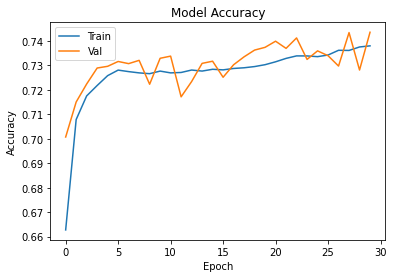

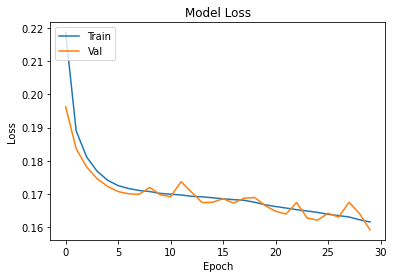

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 74.00%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 89.88%
accuracy: 74.74%
accuracy: 85.49%
accuracy: 70.84%
accuracy: 71.88%
accuracy: 45.51%
accuracy: 18.95%


5-Layer Neural Network Optimized

In [283]:
#5layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Train on 113392 samples, validate on 28349 samples
Epoch 1/50
113392/113392 [==============================] - 12s 108us/step - loss: 0.1612 - accuracy: 0.7259 - val_loss: 0.1509 - val_accuracy: 0.7380
Epoch 2/50
113392/113392 [==============================] - 9s 79us/step - loss: 0.1534 - accuracy: 0.7366 - val_loss: 0.1478 - val_accuracy: 0.7463
Epoch 3/50
113392/113392 [==============================] - 8s 72us/step - loss: 0.1518 - accuracy: 0.7404 - val_loss: 0.1461 - val_accuracy: 0.7506
Epoch 4/50
113392/113392 [==============================] - 8s 71us/step - loss: 0.1503 - accuracy: 0.7432 - val_loss: 0.1468 - val_accuracy: 0.7462
Epoch 5/50
113392/113392 [==============================] - 8s 69us/step - loss: 0.1493 - accuracy: 0.7455 - val_loss: 0.1446 - val_accuracy: 0.7536
Epoch 6/50
113392/113392 [==============================] - 8s 69us/step - loss: 0.1478 - accuracy: 0.7481 - val_loss: 0.1440 - val_accuracy: 0.7558
Epoch 7/50
113392/113392 [===========================

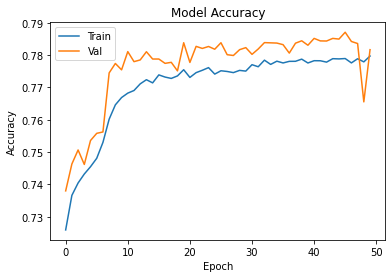

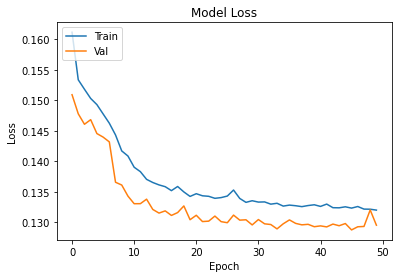

In [284]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [285]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 78.15%


In [286]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 70.66%
accuracy: 70.31%
accuracy: 69.31%
accuracy: 58.01%
accuracy: 63.80%
accuracy: 47.27%
accuracy: 31.29%


In [0]:
#6layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(Dense(2))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Train on 113392 samples, validate on 28349 samples
Epoch 1/50
113392/113392 [==============================] - 9s 78us/step - loss: 0.1624 - accuracy: 0.7255 - val_loss: 0.1481 - val_accuracy: 0.7424
Epoch 2/50
113392/113392 [==============================] - 8s 73us/step - loss: 0.1528 - accuracy: 0.7391 - val_loss: 0.1495 - val_accuracy: 0.7492
Epoch 3/50
113392/113392 [==============================] - 8s 72us/step - loss: 0.1501 - accuracy: 0.7458 - val_loss: 0.1439 - val_accuracy: 0.7524
Epoch 4/50
113392/113392 [==============================] - 8s 73us/step - loss: 0.1476 - accuracy: 0.7507 - val_loss: 0.1422 - val_accuracy: 0.7630
Epoch 5/50
113392/113392 [==============================] - 8s 74us/step - loss: 0.1461 - accuracy: 0.7537 - val_loss: 0.1386 - val_accuracy: 0.7665
Epoch 6/50
113392/113392 [==============================] - 8s 73us/step - loss: 0.1440 - accuracy: 0.7579 - val_loss: 0.1397 - val_accuracy: 0.7650
Epoch 7/50
113392/113392 [=============================

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 77.84%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 75.06%
accuracy: 88.96%
accuracy: 71.79%
accuracy: 64.85%
accuracy: 73.58%
accuracy: 60.28%
accuracy: 28.51%


Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [0]:
dt = DecisionTreeClassifier(max_depth=24,max_features=24,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=24, max_features=24, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
y_pred_dt= dt.predict(X_test)

In [0]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 90.49745662863955
Test Prediction Score 87.47319110509086


In [0]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X1)
dt_score_test = accuracy_score(test_Y1,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X2)
dt_score_test = accuracy_score(test_Y2,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X3)
dt_score_test = accuracy_score(test_Y3,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X4)
dt_score_test = accuracy_score(test_Y4,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X5)
dt_score_test = accuracy_score(test_Y5,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X6)
dt_score_test = accuracy_score(test_Y6,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 69.87451175932851
Test Prediction Score 79.12629610742819
Test Prediction Score 76.90357439733998
Test Prediction Score 68.26666666666667
Test Prediction Score 68.56
Test Prediction Score 79.21333333333334
Test Prediction Score 23.52535140562249


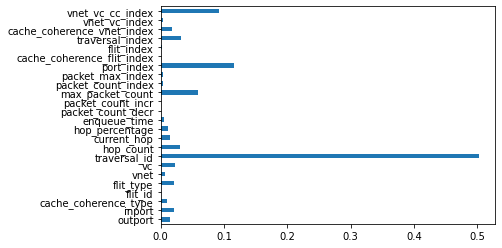

In [0]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

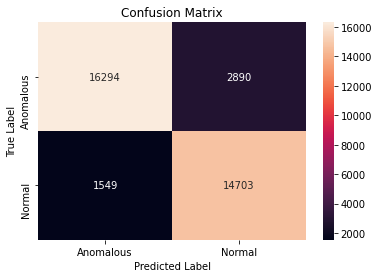

In [0]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88     19184
           1       0.84      0.90      0.87     16252

    accuracy                           0.87     35436
   macro avg       0.87      0.88      0.87     35436
weighted avg       0.88      0.87      0.87     35436



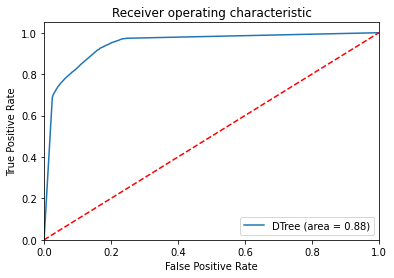

In [0]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

Random Forest Classifier

In [0]:
#randomforest
from sklearn.ensemble import RandomForestClassifier

In [0]:
rf = RandomForestClassifier(max_depth=24,max_features=24,n_estimators=125,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=24, max_features=24,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=125,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
y_pred_rf= rf.predict(X_test)

In [0]:
rf_score_train = rf.score(X_train,y_train)
print("Train Prediction Score",rf_score_train*100)
rf_score_test = accuracy_score(y_test,y_pred_rf)
print("Test Prediction Score",rf_score_test*100)

Train Prediction Score 94.17881911373561
Test Prediction Score 89.27926402528502


In [0]:
y_pred_rf_test= rf.predict(test_X)
rf_score_test = accuracy_score(test_Y,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X1)
rf_score_test = accuracy_score(test_Y1,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X2)
rf_score_test = accuracy_score(test_Y2,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X3)
rf_score_test = accuracy_score(test_Y3,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X4)
rf_score_test = accuracy_score(test_Y4,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X5)
rf_score_test = accuracy_score(test_Y5,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X6)
rf_score_test = accuracy_score(test_Y6,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)

Test Prediction Score 76.77636499626028
Test Prediction Score 86.18901920788713
Test Prediction Score 83.55361596009975
Test Prediction Score 59.28
Test Prediction Score 59.423333333333325
Test Prediction Score 63.29
Test Prediction Score 16.4031124497992


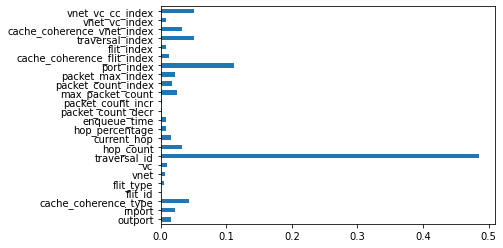

In [0]:
feat_importances = pd.Series(rf.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

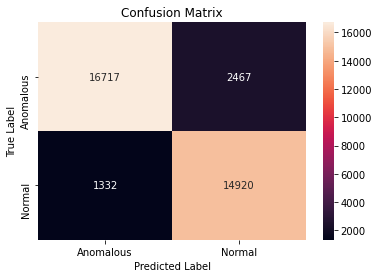

In [0]:
cm = confusion_matrix(y_test, y_pred_rf)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90     19184
           1       0.86      0.92      0.89     16252

    accuracy                           0.89     35436
   macro avg       0.89      0.89      0.89     35436
weighted avg       0.89      0.89      0.89     35436



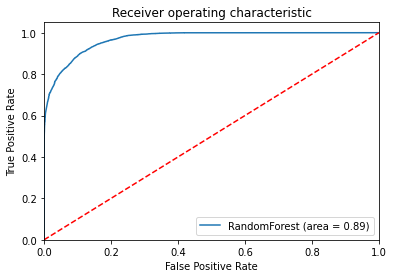

In [0]:
rf_roc_auc = roc_auc_score(y_test, y_pred_rf)
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

XGBoost Classifier

In [0]:
#xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance

In [264]:
xgbc = XGBClassifier(max_depth=24,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=24,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [266]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 98.86553643617584
Test Prediction Score 94.00327350716785


In [267]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X1)
xgbc_score_test = accuracy_score(test_Y1,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X2)
xgbc_score_test = accuracy_score(test_Y2,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X3)
xgbc_score_test = accuracy_score(test_Y3,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X4)
xgbc_score_test = accuracy_score(test_Y4,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X5)
xgbc_score_test = accuracy_score(test_Y5,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X6)
xgbc_score_test = accuracy_score(test_Y6,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 71.40363999002743
Test Prediction Score 67.49107598164203
Test Prediction Score 78.86533665835411
Test Prediction Score 56.67666666666666
Test Prediction Score 56.98333333333333
Test Prediction Score 54.776666666666664
Test Prediction Score 22.02560240963855


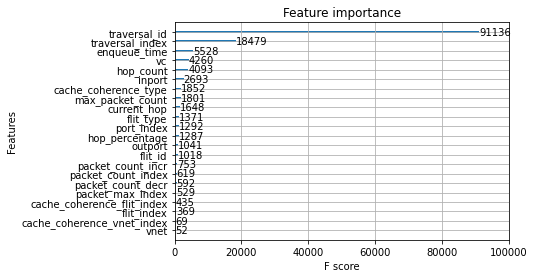

In [268]:
plot_importance(xgbc)
plt.show()

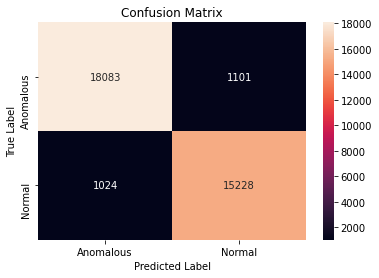

In [269]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [270]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94     19184
           1       0.93      0.94      0.93     16252

    accuracy                           0.94     35436
   macro avg       0.94      0.94      0.94     35436
weighted avg       0.94      0.94      0.94     35436



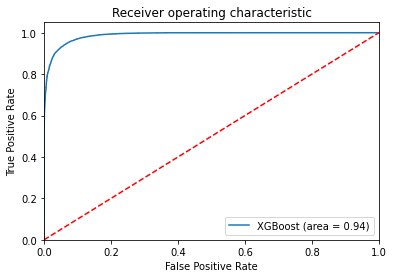

In [271]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()

LightGBM Classifier

In [0]:
#lightgbm
import lightgbm as lgb

In [273]:
gbm = lgb.LGBMClassifier(learning_rate = 0.6,  n_estimators = 500, max_depth = 24, random_state=42, min_child_weight=1,metric='binary',boosting_type = 'dart')
gbm.fit(X_train, y_train)

LGBMClassifier(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.6, max_depth=24,
               metric='binary', min_child_samples=20, min_child_weight=1,
               min_split_gain=0.0, n_estimators=500, n_jobs=-1, num_leaves=31,
               objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [0]:
y_pred_gbm= gbm.predict(X_test)

In [275]:
gbm_score_train = gbm.score(X_train,y_train)
print("Train Prediction Score",gbm_score_train*100)
gbm_score_test = accuracy_score(y_test,y_pred_gbm)
print("Test Prediction Score",gbm_score_test*100)

Train Prediction Score 85.74724321120918
Test Prediction Score 84.0726944350378


In [276]:
y_pred_gbm_test = gbm.predict(test_X)
gbm_score_test = accuracy_score(test_Y,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X1)
gbm_score_test = accuracy_score(test_Y1,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X2)
gbm_score_test = accuracy_score(test_Y2,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X3)
gbm_score_test = accuracy_score(test_Y3,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X4)
gbm_score_test = accuracy_score(test_Y4,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X5)
gbm_score_test = accuracy_score(test_Y5,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X6)
gbm_score_test = accuracy_score(test_Y6,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)

Test Prediction Score 71.6571096152248
Test Prediction Score 64.12969573346932
Test Prediction Score 75.66084788029926
Test Prediction Score 58.08
Test Prediction Score 58.58333333333333
Test Prediction Score 54.36666666666666
Test Prediction Score 25.978915662650603


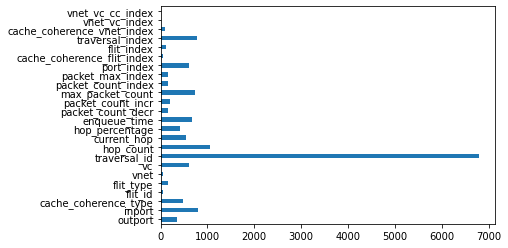

In [277]:
feat_importances = pd.Series(gbm.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

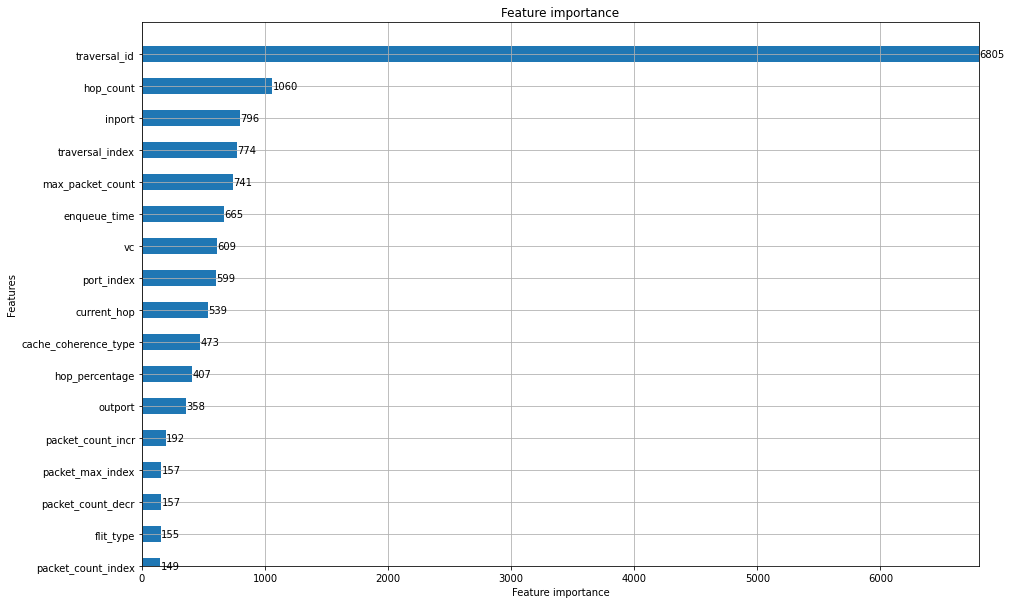

In [278]:
ax = lgb.plot_importance(gbm, height = 0.5, max_num_features = 17, xlim = (0,6800), ylim = (0,17), figsize = (15,10))
plt.show()

In [279]:
sorted(gbm.feature_importances_,reverse=True)

[6805,
 1060,
 796,
 774,
 741,
 665,
 609,
 599,
 539,
 473,
 407,
 358,
 192,
 157,
 157,
 155,
 149,
 109,
 90,
 62,
 55,
 44,
 4,
 0]

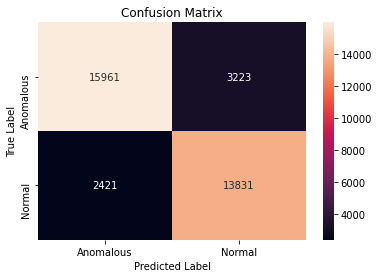

In [280]:
cm = confusion_matrix(y_test, y_pred_gbm)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [281]:
print(classification_report(y_test,y_pred_gbm))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85     19184
           1       0.81      0.85      0.83     16252

    accuracy                           0.84     35436
   macro avg       0.84      0.84      0.84     35436
weighted avg       0.84      0.84      0.84     35436



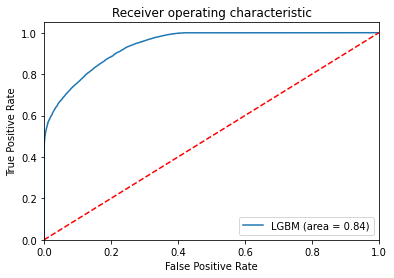

In [282]:
lgbm_roc_auc = roc_auc_score(y_test, y_pred_gbm)
fpr, tpr, thresholds = roc_curve(y_test, gbm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='LGBM (area = %0.2f)' % lgbm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LGBM_ROC')
plt.show()